# This script analyses the exponent evoked auditory responses
## following the temporally resoved estimnation of aperidic activity (multitaper)

In [11]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
from fooof.utils.params import compute_knee_frequency
from pathlib import Path
import glob
from math import floor
import math
import sys
from scipy import stats
import random
from scipy.interpolate import make_interp_spline, BSpline
import random

sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/Aperiodic_sleep_paper/helpers/")
from utils import resample_stages, perform_baseline
from plots import plot_event_related_lines

# Adjust paths

In [12]:
# get all FOOOF files
path_files = '/home/b1044271/Columbia/Results/Time-resolved/E257/*.npy'
aperiodic_files = glob.glob(path_files)

# get all Sleep staging files
staging_files = '/home/b1044271/EEGsleep/SleepStaging/*.txt'
stage_files = glob.glob(staging_files)

# We first start comparing exponent around auditory stimulai vs no-stimulation periods

In [13]:
# get the files for the dummy NREM markers
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*DummyN_FOOOFed_MT.json'
Data_path2 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*DummyR_FOOOFed_MT.json'
Data_path3 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*StimsN_FOOOFed_MT.json'
Data_path4 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*StimsR_FOOOFed_MT.json'
Data_path5 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/Wake/*StimsW_FOOOFed_MT.json'
Data_path6 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/Wake/*DummyW_FOOOFed_MT.json'

    
subj_files = np.sort(glob.glob(Data_path))
Exp_dumN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_dumN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')

    i=i+1
    
# get the files for the dummy REM markers
subj_files = np.sort(glob.glob(Data_path2))
Exp_dumR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_dumR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')

    i=i+1
    
# get the files for the NREM markers
subj_files = np.sort(glob.glob(Data_path3))
Exp_stN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_stN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')

    i=i+1
    
# get the files for the REM markers
subj_files = np.sort(glob.glob(Data_path4))
Exp_stR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_stR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1
    
# get the files for the REM markers
subj_files = np.sort(glob.glob(Data_path5))
Exp_stW = np.ones([15,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_stW[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1
    
    # get the files for the REM markers
subj_files = np.sort(glob.glob(Data_path6))
Exp_dumW = np.ones([15,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_dumW[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1

## Baseline correction

In [10]:
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/MT/Time_5-5_MT.npy') # time vector -5 to 5 MT
# baseline correction

StN_BL = perform_baseline(Exp_stN,time, -0.5,0)
StR_BL = perform_baseline(Exp_stR,time, -0.5,0)
DmN_BL = perform_baseline(Exp_dumN,time, -0.5,0)
DmR_BL = perform_baseline(Exp_dumR,time, -0.5,0)
StW_BL = perform_baseline(Exp_stW,time, -0.5,0)
DmW_BL = perform_baseline(Exp_dumW,time, -0.5,0)

## SAVING

In [21]:
path_res = '/home/b1044271/Columbia/Results/Evoked/'

np.savetxt(path_res +'Stims_NREM.txt', StN_BL)
np.savetxt(path_res +'Dummy_NREM.txt', DmN_BL)

np.savetxt(path_res +'Stims_REM.txt', StR_BL)
np.savetxt(path_res +'Dummy_REM.txt', DmR_BL)

np.savetxt(path_res +'Stims_Wake.txt', StW_BL)
np.savetxt(path_res +'Dummy_Wake.txt', DmW_BL)

# NREM

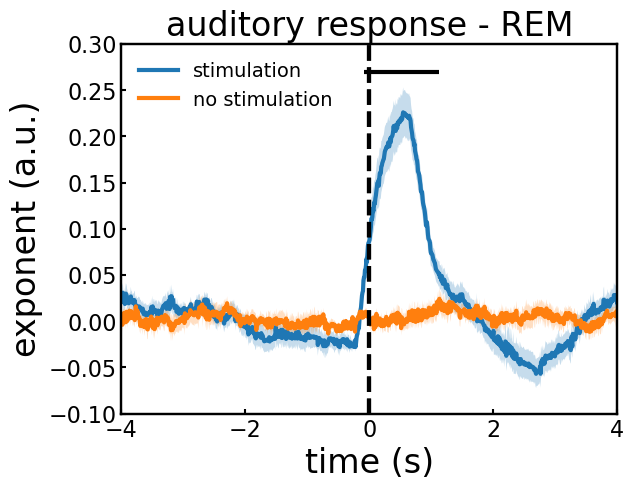

In [33]:
sel =[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16] # removed 1 subject that had high fluctuations in R2

StN2_BL = StN_BL[sel,:]
DmN2_BL = DmN_BL[sel,:]

np.savetxt(path_res +'Stims_NREM_16.txt', StN2_BL)
np.savetxt(path_res +'Dummy_NREM_16.txt', DmN2_BL)

# adjust
AllSm = np.nanmean(StN2_BL,axis=0)
AllSs = stats.sem(StN2_BL,0, nan_policy = 'omit')

AllDm = np.nanmean(DmN2_BL,axis=0)
AllDs = stats.sem(DmN2_BL,0, nan_policy = 'omit')


plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm ,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
plt.hlines(y = 0.27, xmin = time[615], xmax = time[765], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-0.1,0.3)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent (a.u.)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_NREM_16.svg", dpi = 600)

# REM

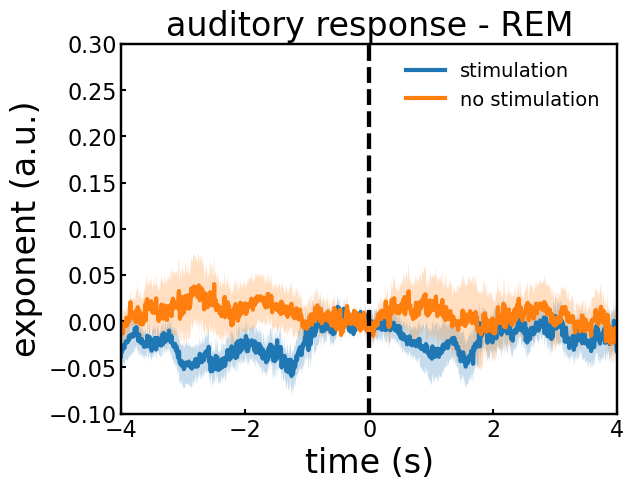

In [28]:
StR2_BL = StR_BL[1:,:]
DmR2_BL = DmR_BL[1:,:]

np.savetxt(path_res +'Stims_REM_16.txt', StR2_BL)
np.savetxt(path_res +'Dummy_REM_16.txt', DmR2_BL)
# adjust
AllSm = np.nanmean(StR2_BL,axis=0)
AllSs = stats.sem(StR2_BL,0, nan_policy = 'omit')

AllDm = np.nanmean(DmR2_BL,axis=0)
AllDs = stats.sem(DmR2_BL,0, nan_policy = 'omit')


plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm ,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 0.095, xmin = time[604], xmax = time[760], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-0.1,0.3)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent (a.u.)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_REM_16.svg", dpi = 600)

# WAKE

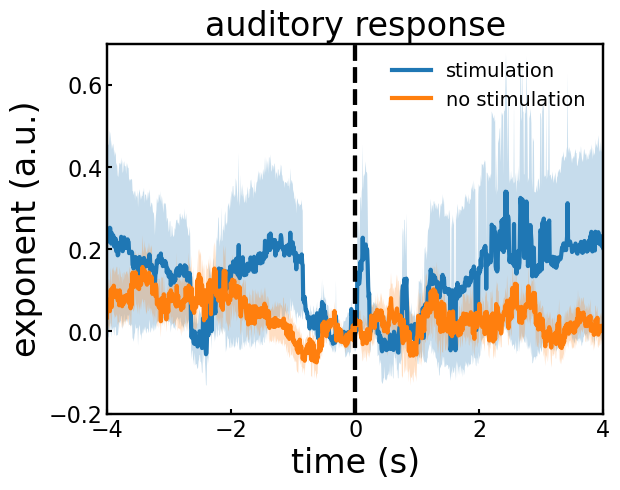

In [6]:
# adjust
AllSm = np.nanmean(StW_BL,axis=0)
AllSs = stats.sem(StW_BL,0, nan_policy = 'omit')

AllDm = np.nanmean(DmW_BL,axis=0)
AllDs = stats.sem(DmW_BL,0, nan_policy = 'omit')



plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm - AllSs, AllSm + AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm+ AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 0.12, xmin = time[609], xmax = time[712], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-0.2,0.7)
plt.ylabel("exponent (a.u.)", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

#ax.ticklabel_format(axis='y', scilimits=[-0.05, 0.1])

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_Wake_last.svg", dpi = 600)

# KC vs NO KC

In [14]:
# Set paths
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/KC/NEW/*StimNoKC_UFV_FOOOFed_MT_128.json'
Data_path2 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/KC/NEW/*StimKC_UFV_FOOOFed_MT_128.json'
 
# get the files for the no K-complex
subj_files = np.sort(glob.glob(Data_path))
Exp_snKC = np.ones([17,640]) * np.nan
Knee_snKC = np.ones([17,640]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_snKC[i,0:640] = fm1.get_params('aperiodic_params','exponent')
    Knee_snKC[i,0:640] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the files for K-complexes
subj_files = np.sort(glob.glob(Data_path2))
Exp_sKC = np.ones([17,640]) * np.nan
Knee_sKC = np.ones([17,640]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_sKC[i,0:640] = fm1.get_params('aperiodic_params','exponent')
    Knee_sKC[i,0:640] = fm1.get_params('aperiodic_params','knee')

    i=i+1

## Baseline correction

In [15]:
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/KC/NEW/Times_transitions_MT_128.npy') # time vector -5 to 5 MT
# baseline correction

KC_BL = perform_baseline(Exp_sKC,time, -0.5,0)
NKC_BL = perform_baseline(Exp_snKC,time, -0.5,0)


In [ ]:
# SAVING
np.savetxt(path_perm +'KC_all.txt', Exp_sKC)
np.savetxt(path_perm +'NoKC_all.txt', Exp_snKC)

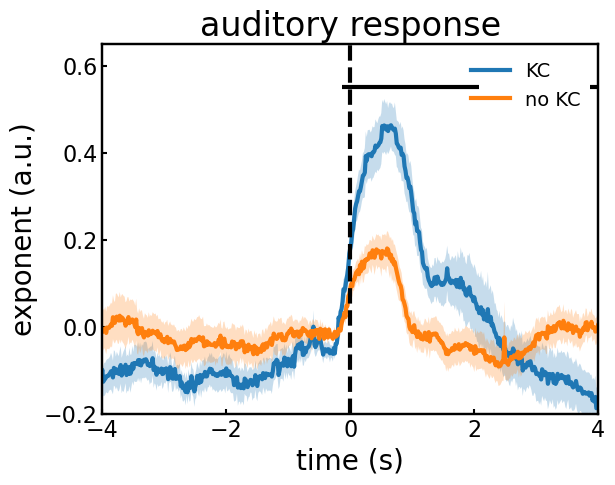

In [39]:
K_K_O = np.nanmean(KC_BL,axis=0)
K_K_Os = stats.sem(KC_BL,0, nan_policy = 'omit')

plt.plot(time, K_K_O ,color='tab:blue',linestyle='-',linewidth=3, label = 'KC')
plt.fill_between(time,K_K_O -K_K_Os, K_K_O+K_K_Os,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)


K_K_On = np.nanmean(NKC_BL,axis=0)
K_K_Osn = stats.sem(NKC_BL,0, nan_policy = 'omit')


plt.plot(time, K_K_On ,color='tab:orange',linestyle='-',linewidth=3, label = 'no KC')
plt.fill_between(time,K_K_On -K_K_Osn, K_K_On+K_K_Osn,facecolor='tab:orange', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth = 3)
plt.xlim(-4,4)
plt.ylim(-0.2,0.65)
plt.ylabel("exponent (a.u.)", fontsize =20)
plt.xlabel("time (s)", fontsize = 20)
plt.xticks(fontsize=20)

ax=plt.gca()

plt.hlines(y = 0.55, xmin = time[311], xmax = time[453], color='k',linestyle='-',linewidth=3)
plt.hlines(y = 0.55, xmin = time[567], xmax = time[639], color='k',linestyle='-',linewidth=3)


ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_KCN2_NEW_UFV.svg", dpi = 600)

# Get local Maxima

In [29]:
XX=np.zeros(17)*np.nan
for i in np.arange(17):
    X=KC_BL[i]
    X2 = X[320:448] #0 - 2s post stim onset
    X3 =  np.argmax(X2, axis=None)    
    XX[i] = X3+320

path_res = '/home/b1044271/Columbia/Results/Evoked/'
np.save(path_res + 'localMax_KC.npy',XX)


In [45]:
XX=np.zeros(17)*np.nan
for i in np.arange(17):
    X=NKC_BL[i]
    X2 = X[320:448] #0 - 2s post stim onset
    X3 =  np.argmax(X2, axis=None)    
    XX[i] = X3+320

path_res = '/home/b1044271/Columbia/Results/Evoked/'
np.save(path_res + 'localMax_noKC.npy',XX)

# Stimulus categories

## FV vs UFV

In [38]:
# adjust paths
Data_path  = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stims/NEW/*_FVN_FOOOFed_MT.json'
Data_path2 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stims/NEW/*_UFVN_FOOOFed_MT.json'
Data_path3 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stims/NEW/*_FVR_FOOOFed_MT.json'
Data_path4 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stims/NEW/*_UFVR_FOOOFed_MT.json'

# get the files for the FV NREM markers
subj_files = np.sort(glob.glob(Data_path))
Exp_FVN = np.ones([17,1250]) * np.nan
K_FVN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:
    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_FVN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_FVN[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the files for the UFV NREM markers
subj_files = np.sort(glob.glob(Data_path2))
Exp_UFVN = np.ones([17,1250]) * np.nan
K_UFVN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:
    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_UFVN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_UFVN[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the files for the FV NREM markers
subj_files = np.sort(glob.glob(Data_path3))
Exp_FVR = np.ones([17,1250]) * np.nan
K_FVR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:
    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_FVR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_FVR[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the files for the FV NREM markers
subj_files = np.sort(glob.glob(Data_path4))
Exp_UFVR = np.ones([17,1250]) * np.nan
K_UFVR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:
    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_UFVR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_UFVR[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1

In [39]:
# BASELINE

FVN_BL = perform_baseline(Exp_FVN,time, -0.5,0)
UFVN_BL = perform_baseline(Exp_UFVN,time, -0.5,0)
FVR_BL = perform_baseline(Exp_FVR,time, -0.5,0)
UFVR_BL = perform_baseline(Exp_UFVR,time, -0.5,0)

np.savetxt(path_res +'FV_NREM.txt', FVN_BL)
np.savetxt(path_res +'UFV_NREM.txt', UFVN_BL)
np.savetxt(path_res +'FV_REM.txt', FVR_BL)
np.savetxt(path_res +'UFV_REM.txt', UFVR_BL)

In [40]:
# adjust for plotting
AllFVm = np.nanmean(FVN_BL,axis=0)
AllFVs = stats.sem(FVN_BL,0, nan_policy = 'omit')

AllUFVm = np.nanmean(UFVN_BL,axis=0)
AllUFVs = stats.sem(UFVN_BL,0, nan_policy = 'omit')


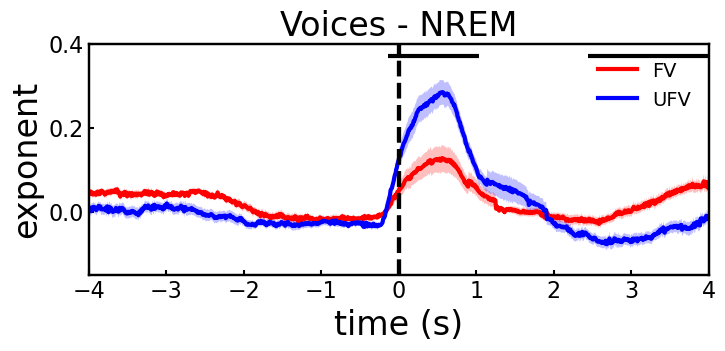

In [90]:
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/MT/Time_5-5_MT.npy') # time vector -5 to 5 MT

plt.figure(figsize=(8,3))  


plt.plot(time, AllFVm ,color='red',linestyle='-',linewidth=3, label = 'FV')
plt.fill_between(time,AllFVm -AllFVs, AllFVm+AllFVs,facecolor='red', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllUFVm ,color='blue',linestyle='-',linewidth=3, label = 'UFV')
plt.fill_between(time,AllUFVm -AllUFVs, AllUFVm+AllUFVs,facecolor='blue', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Voices - NREM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

plt.hlines(y = 0.37, xmin = time[608], xmax = time[754], color='k',linestyle='-',linewidth=3)
plt.hlines(y = 0.37, xmin = time[930], xmax = time[1125], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-0.15,0.4)
plt.ylabel("exponent", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth = 3)
plt.xticks(fontsize=20)

ax=plt.gca()

ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_FVUFV_NREM.svg", dpi = 600)

In [41]:
# adjust for plotting
AllFVm = np.nanmean(FVR_BL,axis=0)
AllFVs = stats.sem(FVR_BL,0, nan_policy = 'omit')

AllUFVm = np.nanmean(UFVR_BL,axis=0)
AllUFVs = stats.sem(UFVR_BL,0, nan_policy = 'omit')

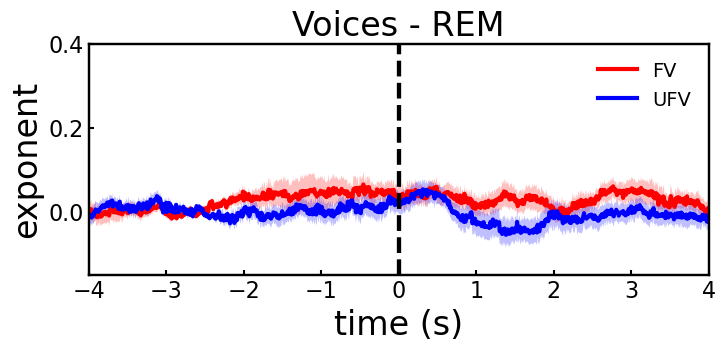

In [43]:
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/MT/Time_5-5_MT.npy') # time vector -5 to 5 MT

plt.figure(figsize=(8,3))  

plt.plot(time, AllFVm ,color='red',linestyle='-',linewidth=3, label = 'FV')
plt.fill_between(time,AllFVm -AllFVs, AllFVm+AllFVs,facecolor='red', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllUFVm ,color='blue',linestyle='-',linewidth=3, label = 'UFV')
plt.fill_between(time,AllUFVm -AllUFVs, AllUFVm+AllUFVs,facecolor='blue', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Voices - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

#plt.hlines(y = 0.67, xmin = time[606], xmax = time[777], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-0.15,0.4)
plt.ylabel("exponent", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth = 3)
plt.xticks(fontsize=20)

ax=plt.gca()

ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_FVUFV_REM.svg", dpi = 600)

## SON vs UNs

In [59]:
# adjust paths
Data_path  = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Cat/*_SONN_FOOOFed_MT.json'
Data_path2 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Cat/*_UNN_FOOOFed_MT.json'
Data_path3 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Cat/*_SONR_FOOOFed_MT.json'
Data_path4 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Cat/*_UNR_FOOOFed_MT.json'

    
# get the files for the FV NREM markers
subj_files = np.sort(glob.glob(Data_path))
Exp_SONN = np.ones([17,1250]) * np.nan
K_SONN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_SONN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_SONN[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the files for the FV NREM markers
subj_files = np.sort(glob.glob(Data_path2))
Exp_UNN = np.ones([17,1250]) * np.nan
K_UNN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_UNN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_UNN[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the files for the FV NREM markers
subj_files = np.sort(glob.glob(Data_path3))
Exp_SONR = np.ones([17,1250]) * np.nan
K_SONR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_SONR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_SONR[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1
    
# get the files for the FV NREM markers
subj_files = np.sort(glob.glob(Data_path4))
Exp_UNR = np.ones([17,1250]) * np.nan
K_UNR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_UNR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    K_UNR[i,0:1250] = fm1.get_params('aperiodic_params','knee')

    i=i+1

In [66]:
#baseline correction
SONN_BL = perform_baseline(Exp_SONN,time, -0.5,0)
UNN_BL = perform_baseline(Exp_UNN,time, -0.5,0)
SONR_BL = perform_baseline(Exp_SONR,time, -0.5,0)
UNR_BL = perform_baseline(Exp_UNR,time, -0.5,0)

np.savetxt(path_res +'SON_NREM.txt', SONN_BL)
np.savetxt(path_res +'UN_NREM.txt', UNN_BL)
np.savetxt(path_res +'SON_REM.txt', SONR_BL)
np.savetxt(path_res +'UN_REM.txt', UNR_BL)

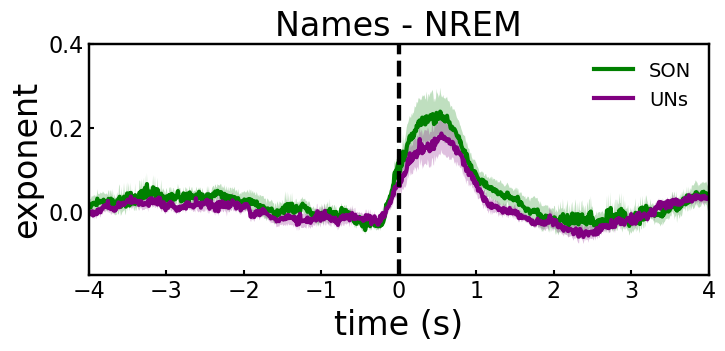

In [67]:
AllSONm = np.nanmean(SONN_BL,axis=0)
AllSONs = stats.sem(SONN_BL,0, nan_policy = 'omit')

AllUNm = np.nanmean(UNN_BL,axis=0)
AllUNs = stats.sem(UNN_BL,0, nan_policy = 'omit')

plt.figure(figsize=(8,3))  

plt.plot(time, AllSONm ,color='green',linestyle='-',linewidth=3, label = 'SON')
plt.fill_between(time,AllSONm -AllSONs, AllSONm+AllSONs,facecolor='green', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllUNm ,color='purple',linestyle='-',linewidth=3, label = 'UNs')
plt.fill_between(time,AllUNm -AllUNs, AllUNm+AllUNs,facecolor='purple', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Names - NREM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)
 

plt.xlim(-4,4)
plt.ylim(-0.15,0.4)
plt.ylabel("exponent", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth = 3)
plt.xticks(fontsize=20)

ax=plt.gca()

ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_SONUN_NREM.svg", dpi = 600)

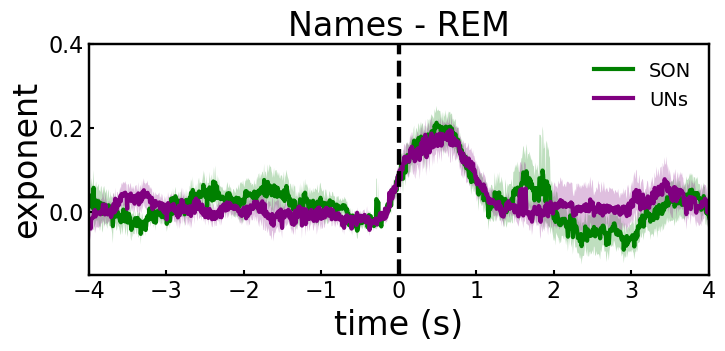

In [68]:
AllSONm = np.nanmean(SONR_BL,axis=0)
AllSONs = stats.sem(SONR_BL,0, nan_policy = 'omit')

AllUNm = np.nanmean(UNR_BL,axis=0)
AllUNs = stats.sem(UNR_BL,0, nan_policy = 'omit')

plt.figure(figsize=(8,3))  

plt.plot(time, AllSONm ,color='green',linestyle='-',linewidth=3, label = 'SON')
plt.fill_between(time,AllSONm -AllSONs, AllSONm+AllSONs,facecolor='green', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllUNm ,color='purple',linestyle='-',linewidth=3, label = 'UNs')
plt.fill_between(time,AllUNm -AllUNs, AllUNm+AllUNs,facecolor='purple', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Names - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)
 

plt.xlim(-4,4)
plt.ylim(-0.15,0.4)
plt.ylabel("exponent", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth = 3)
plt.xticks(fontsize=20)

ax=plt.gca()

ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_SONUN_REM.svg", dpi = 600)

# R2

In [93]:
# get the files for the dummy NREM markers
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*DummyN_FOOOFed_MT.json'
Data_path2 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*DummyR_FOOOFed_MT.json'
Data_path3 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*StimsN_FOOOFed_MT.json'
Data_path4 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*StimsR_FOOOFed_MT.json'
Data_path3 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*StimsN_FOOOFed_MT.json'
Data_path4 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/AR/*StimsR_FOOOFed_MT.json'

subj_files = np.sort(glob.glob(Data_path))
R2_dumN = np.ones([17,1250]) * np.nan

i=0
np.random.seed(10)
random.seed(10)

for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    R2_dumN[i,0:1250] = fm1.get_params('r_squared')

    i=i+1
    
# get the files for the dummy REM markers
subj_files = np.sort(glob.glob(Data_path2))
R2_dumR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    R2_dumR[i,0:1250] = fm1.get_params('r_squared')

    i=i+1
    
# get the files for the NREM markers
subj_files = np.sort(glob.glob(Data_path3))
R2_stN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    R2_stN[i,0:1250] = fm1.get_params('r_squared')


    i=i+1
    
# get the files for the REM markers
subj_files = np.sort(glob.glob(Data_path4))
R2_stR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    R2_stR[i,0:1250] = fm1.get_params('r_squared')
    
    i=i+1

In [94]:
# adjust
R2_stR2 = R2_stR[1:,:]
R2_dumR2 = R2_dumR[1:,:]


AllSm = np.nanmean(R2_stR2,axis=0)
AllSs = stats.sem(R2_stR2,0, nan_policy = 'omit')

AllDm = np.nanmean(R2_dumR2,axis=0)
AllDs = stats.sem(R2_dumR2,0, nan_policy = 'omit')

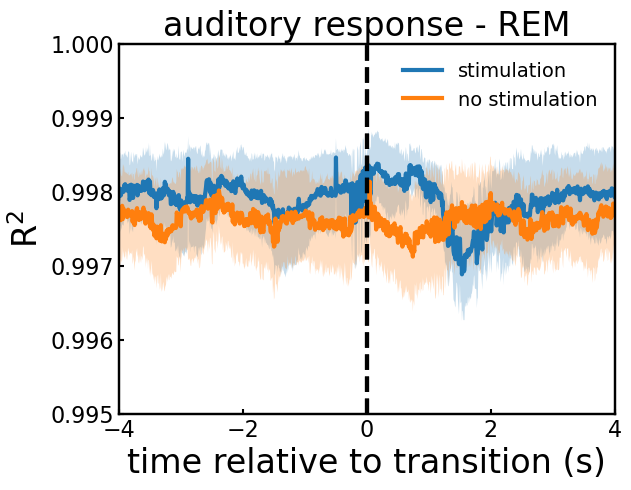

In [98]:
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/MT/Time_5-5_MT.npy') # time vector -5 to 5 MT


plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm ,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 0.095, xmin = time[604], xmax = time[760], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(0.995,1)
plt.ylabel("exponent", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('R$^2$', fontsize=24)
plt.xlabel('time relative to transition (s)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

#ax.ticklabel_format(axis='y', scilimits=[-0.05, 0.1])

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_R2_REM.svg", dpi = 600)

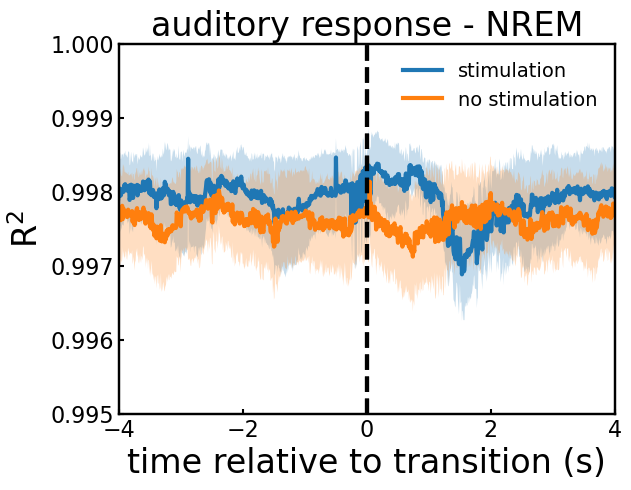

In [97]:
# adjust
sel =[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16]


R2_stN2 = R2_stN[ sel,:]
R2_dumN2 = R2_dumN[sel,:]


AllSm = np.nanmean(R2_stN2,axis=0)
AllSs = stats.sem(R2_stN2,0, nan_policy = 'omit')

AllDm = np.nanmean(R2_dumN2,axis=0)
AllDs = stats.sem(R2_dumN2,0, nan_policy = 'omit')

time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/MT/Time_5-5_MT.npy') # time vector -5 to 5 MT


plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm ,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - NREM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 0.095, xmin = time[604], xmax = time[760], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(0.995,1)
plt.ylabel("exponent", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('R$^2$', fontsize=24)
plt.xlabel('time relative to transition (s)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

#ax.ticklabel_format(axis='y', scilimits=[-0.05, 0.1])

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_R2_NREM.svg", dpi = 600)

In [120]:
R2_stN[3, 700:900]

array([0.99841116, 0.99842564, 0.99852281, 0.9984455 , 0.99847454,
       0.99852182, 0.9984239 , 0.99850574, 0.99851684, 0.99841953,
       0.99844036, 0.9984668 , 0.99850445, 0.99857195, 0.99850839,
       0.99849306, 0.9985024 , 0.99849269, 0.99856338, 0.99857231,
       0.99852741, 0.99854712, 0.99859285, 0.9985938 , 0.99838124,
       0.9983854 , 0.99862119, 0.99830074, 0.99835252, 0.99838146,
       0.99841382, 0.9984368 , 0.99841959, 0.99875989, 0.9987545 ,
       0.99877183, 0.99881491, 0.9989046 , 0.99887865, 0.99879336,
       0.99888396, 0.99891842, 0.99890942, 0.99893409, 0.99892715,
       0.99894723, 0.9989809 , 0.99895814, 0.99896975, 0.9989832 ,
       0.99900327, 0.99904448, 0.99900043, 0.99899841, 0.99900431,
       0.99896688, 0.99904647, 0.99904489, 0.99896969, 0.99899577,
       0.9990195 , 0.99899113, 0.99902267, 0.99902682, 0.99895358,
       0.99899249, 0.99906381, 0.9990646 , 0.99901784, 0.99900152,
       0.99900081, 0.99895558, 0.95894907, 0.95877999, 0.95829

# NREM - REM separately

In [19]:
# get the files for the dummy NREM markers
Data_path = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/*DummyN_FOOOFed_MT.json'
Data_path2 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/*DummyR_FOOOFed_MT.json'
Data_path3 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/*StimsN_FOOOFed_MT.json'
Data_path4 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/*StimsR_FOOOFed_MT.json'
Data_path5 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/*StimsW_FOOOFed_MT.json'
Data_path6 = '/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/Stim_NoStim/NEW/*DummyW_FOOOFed_MT.json'

    
subj_files = np.sort(glob.glob(Data_path))
Exp_dumN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_dumN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')

    i=i+1
    
# get the files for the dummy REM markers
subj_files = np.sort(glob.glob(Data_path2))
Exp_dumR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_dumR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')

    i=i+1
    
# get the files for the NREM markers
subj_files = np.sort(glob.glob(Data_path3))
Exp_stN = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_stN[i,0:1250] = fm1.get_params('aperiodic_params','exponent')

    i=i+1
    
# get the files for the REM markers
subj_files = np.sort(glob.glob(Data_path4))
Exp_stR = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_stR[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1
    
# get the files for the REM markers
subj_files = np.sort(glob.glob(Data_path5))
Exp_stW = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_stW[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1
    
    # get the files for the REM markers
subj_files = np.sort(glob.glob(Data_path6))
Exp_dumW = np.ones([17,1250]) * np.nan

i=0
for x in subj_files:

    fm1 = FOOOFGroup()
    fm1.load(x)
    Exp_dumW[i,0:1250] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1

In [20]:
time = np.load('/home/b1044271/Columbia/Results/Time-resolved/Transitions/Cz/MT/Time_5-5_MT.npy') # time vector -5 to 5 MT
# baseline correction

StN_BL = perform_baseline(Exp_stN,time, -0.5,0)
StR_BL = perform_baseline(Exp_stR,time, -0.5,0)
DmN_BL = perform_baseline(Exp_dumN,time, -0.5,0)
DmR_BL = perform_baseline(Exp_dumR,time, -0.5,0)
StW_BL = perform_baseline(Exp_stW,time, -0.5,0)
DmW_BL = perform_baseline(Exp_dumW,time, -0.5,0)

/home/b1044271/Columbia/Aperiodic_sleep/Aperiodic_sleep_paper/helpers/utils.py:316: RuntimeWarning: Mean of empty slice
  meanBL = np.nanmean(dataV[b,bl])


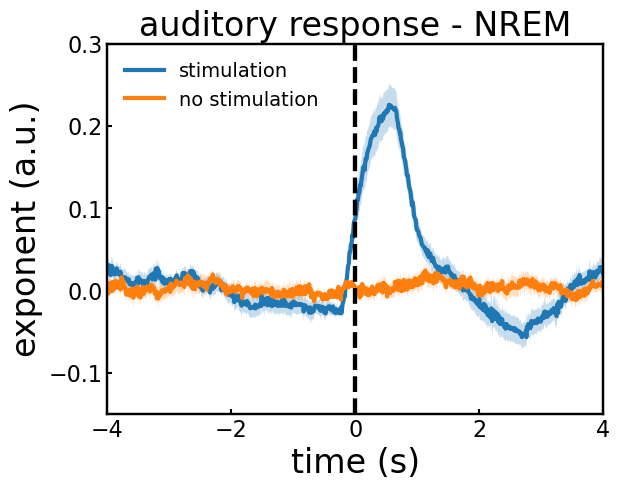

In [125]:
# adjust
sel =[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16]


StN2_BL = StN_BL[ sel,:]
DmN2_BL = DmN_BL[sel,:]

AllSm = np.nanmean(StN2_BL,axis=0)
AllSs = stats.sem(StN2_BL,0, nan_policy = 'omit')

AllDm = np.nanmean(DmN2_BL,axis=0)
AllDs = stats.sem(DmN2_BL,0, nan_policy = 'omit')


plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm ,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - NREM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 0.095, xmin = time[604], xmax = time[760], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-0.15,0.3)
plt.ylabel("exponent (a.u.)", fontsize = 24)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)



#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_NREM_last.svg", dpi = 600)

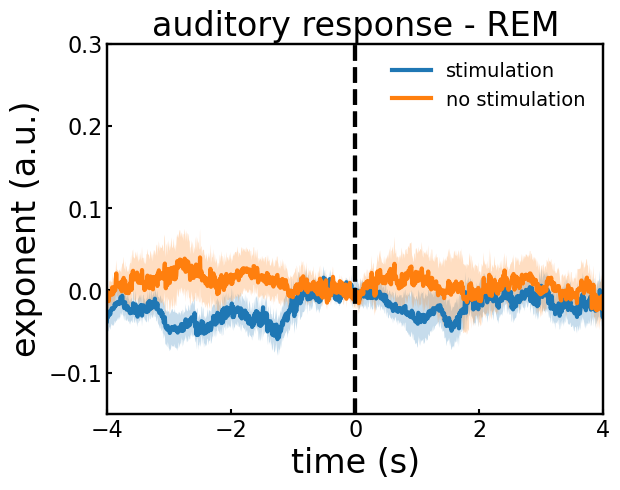

In [126]:
# adjust
StR2_BL = StR_BL[1:,:]
DmR2_BL = DmR_BL [1:,:]

# adjust
AllSm = np.nanmean(StR2_BL,axis=0)
AllSs = stats.sem(StR2_BL,0, nan_policy = 'omit')

AllDm = np.nanmean(DmR2_BL,axis=0)
AllDs = stats.sem(DmR2_BL,0, nan_policy = 'omit')


plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm ,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 0.095, xmin = time[604], xmax = time[760], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-0.15,0.3)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent (a.u.)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_REM_last.svg", dpi = 600)

/tmp/ipykernel_786719/139041552.py:2: RuntimeWarning: Mean of empty slice
  AllSm = np.nanmean(StW_BL,axis=0)
/tmp/ipykernel_786719/139041552.py:5: RuntimeWarning: Mean of empty slice
  AllDm = np.nanmean(DmW_BL,axis=0)


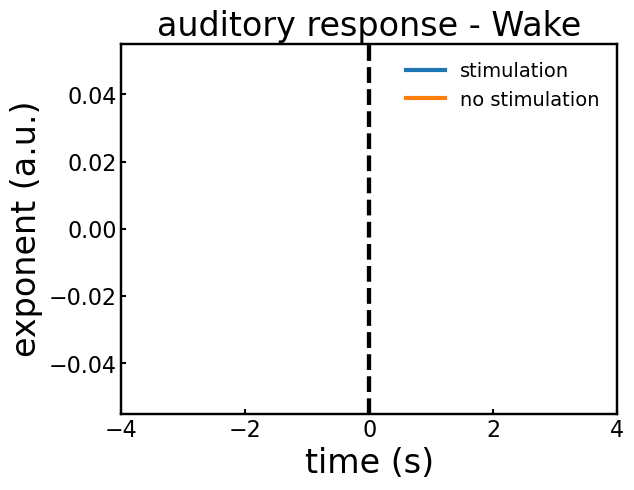

In [24]:
# adjust
AllSm = np.nanmean(StW_BL,axis=0)
AllSs = stats.sem(StW_BL,0, nan_policy = 'omit')

AllDm = np.nanmean(DmW_BL,axis=0)
AllDs = stats.sem(DmW_BL,0, nan_policy = 'omit')


plt.plot(time, AllSm ,color='tab:blue',linestyle='-',linewidth=3, label = 'stimulation')
plt.fill_between(time,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(time, AllDm ,color='tab:orange',linestyle='-',linewidth=3, label = 'no stimulation')
plt.fill_between(time,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - Wake", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 0.095, xmin = time[604], xmax = time[760], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
#plt.ylim(-0.2,0.25)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('exponent (a.u.)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/TR_Stims_all_REM_last.svg", dpi = 600)

# Get Local Maxima for evoked responses
## in order to plot the PSDs 

In [18]:

# NREM
XX=np.zeros(17)*np.nan
for i in np.arange(17):
    X=Exp_stN[i]
    X2 = X[625:750]
    X3 =  np.argmax(X2, axis=None)    
    XX[i] = X3+625

path_res = '/home/b1044271/Columbia/Results/'
np.save(path_res + 'localMax_NREM.npy',XX)

# REM
XX=np.zeros(17)*np.nan
for i in np.arange(17):
    X=Exp_stR[i]
    X2 = X[625:750]
    X3 =  np.argmax(abs(X2), axis=None)    
    XX[i] = X3+625
   
path_res = '/home/b1044271/Columbia/Results/'
np.save(path_res + 'localMax_REM.npy',XX)